In [1]:
from IPython import get_ipython


# Segment Lights
In this notebook, the model the Christmas tree is calculated from a set of video recordings.

In [2]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
get_ipython().run_line_magic('matplotlib', 'inline')


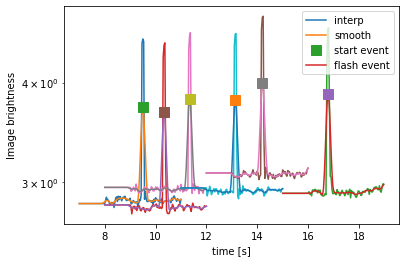

In [2]:
# Identify start and end of recording
# Create images from the videos

import cv2
import numpy as np
import matplotlib.pyplot as plt

from xmas_lights import TreeDetector

# geneva tree
videoPath = ['data/geneva_tree/bulb_triangulation_1.mp4',
             'data/geneva_tree/bulb_triangulation_2.mp4',
             'data/geneva_tree/bulb_triangulation_3.mp4',
             'data/geneva_tree/bulb_triangulation_4.mp4',
             'data/geneva_tree/bulb_triangulation_5.mp4',
             'data/geneva_tree/bulb_triangulation_6.mp4']
time_start_aprox = [9, 10, 10, 13, 17, 14]
num_bulbs = 450

# Cali tree
# videoPath = ['data/bulb_triangulation_1.mp4',
#              'data/bulb_triangulation_2.mp4',
#              'data/bulb_triangulation_3.mp4',
#              'data/bulb_triangulation_4.mp4',
#              'data/bulb_triangulation_5.mp4']
# time_start_aprox = [2, 2, 1, 16, 2]
# num_bulbs = 100

output_folder = [p.split('.')[0] for p in videoPath]
bulb_image_name = 'img_%04d.jpg'
all_image_name = 'all.jpg'

for vpath, t0, folder in zip(videoPath, time_start_aprox, output_folder):
    os.system('rm -rf %s ; mkdir -p %s' % (folder, folder))

    td = TreeDetector(vpath, num_bulbs=num_bulbs)
    td.set_time(t0)
    time_start = td.find_flash_events(viz=True)

    td.set_time(time_start)
    ret, frame = td.read()

    output_file = os.path.join(folder, all_image_name)
    cv2.imwrite(output_file, frame)

    for bulb_num, itime in enumerate(time_start + td.flash_pattern_time):
        td.set_time(itime)
        ret, frame = td.read()

        output_file = os.path.join(folder, bulb_image_name % bulb_num)
        cv2.imwrite(output_file, frame)


In [6]:
# find background
import cv2
import numpy as np
import matplotlib.pyplot as plt

from xmas_lights import TreeDetector

videoPath = ['data/geneva_tree/bulb_triangulation_1.mp4',
             'data/geneva_tree/bulb_triangulation_2.mp4',
             'data/geneva_tree/bulb_triangulation_3.mp4',
             'data/geneva_tree/bulb_triangulation_4.mp4',
             'data/geneva_tree/bulb_triangulation_5.mp4',
             'data/geneva_tree/bulb_triangulation_6.mp4']
time_start_aprox = [9, 10, 10, 13, 17, 14]
num_bulbs = 450

output_folder = [p.split('.')[0] for p in videoPath]
bulb_image_name = 'img_%04d.jpg'
all_image_name = 'all.jpg'
background_img_name = 'background.jpg'

for vpath, t0, folder in zip(videoPath, time_start_aprox, output_folder):
    # os.system('rm -rf %s ; mkdir -p %s' % (folder, folder))

    td = TreeDetector(vpath, num_bulbs=num_bulbs)
    td.set_time(t0)
    time_start = td.find_flash_events(viz=False)

    # td.set_time(time_start)
    # ret, frame = td.read()

    # output_file = os.path.join(folder, all_image_name)
    # cv2.imwrite(output_file, frame)

    flash_period = np.median(np.diff(td.flash_pattern_time))
    time_between_flash = time_start + td.flash_pattern_time + flash_period / 2

    frames = []
    for bulb_num, itime in enumerate(time_between_flash):
        td.set_time(itime)
        ret, frame = td.read()

        frames.append(frame)

    frames_np = np.array(frames)
    frame_avg = np.round(np.mean(frames_np, axis=0)).astype('uint8')

    output_file = os.path.join(folder, background_img_name)
    cv2.imwrite(output_file, frame_avg)
    print('completed %s' % vpath)


completed data/geneva_tree/bulb_triangulation_1.mp4
completed data/geneva_tree/bulb_triangulation_2.mp4
completed data/geneva_tree/bulb_triangulation_3.mp4
completed data/geneva_tree/bulb_triangulation_4.mp4
completed data/geneva_tree/bulb_triangulation_5.mp4
completed data/geneva_tree/bulb_triangulation_6.mp4


In [7]:
videoPath = ['data/geneva_tree/bulb_triangulation_1.mp4',
             'data/geneva_tree/bulb_triangulation_2.mp4',
             'data/geneva_tree/bulb_triangulation_3.mp4',
             'data/geneva_tree/bulb_triangulation_4.mp4',
             'data/geneva_tree/bulb_triangulation_5.mp4',
             'data/geneva_tree/bulb_triangulation_6.mp4']
time_start_aprox = [9, 10, 10, 13, 17, 14]
num_bulbs = 450

output_folder = [p.split('.')[0] for p in videoPath]
bulb_image_name = 'img_%04d.jpg'
all_image_name = 'all.jpg'

image_path = [os.path.join(vpath.split('.')[0], 'img_%04d.jpg') for vpath in videoPath]
image_path

['data/geneva_tree/bulb_triangulation_1/img_%04d.jpg',
 'data/geneva_tree/bulb_triangulation_2/img_%04d.jpg',
 'data/geneva_tree/bulb_triangulation_3/img_%04d.jpg',
 'data/geneva_tree/bulb_triangulation_4/img_%04d.jpg',
 'data/geneva_tree/bulb_triangulation_5/img_%04d.jpg',
 'data/geneva_tree/bulb_triangulation_6/img_%04d.jpg']

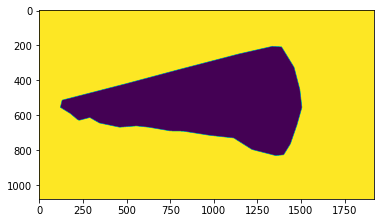

In [20]:
# tmp = 

plt.imshow(~tmp)

In [29]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2 
# Segment bulb from image

HSV_MIN = (25, 150, 7)
HSV_MAX = (180, 255, 260)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
foreground_img_name = 'foreground.jpg'

imgpoints = []
imgs = []

for folder in output_folder:

    imgp = []
    # masks = []

    image_path = os.path.join(folder, all_image_name)
    frame = cv2.imread(image_path)
    imgs.append(frame)

    image_path = os.path.join(folder, background_img_name)
    background = cv2.imread(image_path).astype('int16')

    image_path = os.path.join(folder, foreground_img_name)
    foreground = cv2.imread(image_path)
    foreground = (cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY) > 0).astype('uint8')

    for bulb_num in range(num_bulbs):
        image_path = os.path.join(folder, bulb_image_name % bulb_num)
        frame = cv2.imread(image_path)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        mask = (hsv[:,:,0] >= HSV_MIN[0]) & (hsv[:,:,0] <= HSV_MAX[0]) & \
                (hsv[:,:,1] >= HSV_MIN[1]) & (hsv[:,:,1] <= HSV_MAX[1]) & \
                (hsv[:,:,2] >= HSV_MIN[2]) & (hsv[:,:,2] <= HSV_MAX[2])

        background_mask = np.sum(np.abs(frame.astype('int16') - background), axis=2) < 50
        mask = mask & foreground & (~background_mask)

        mask = cv2.morphologyEx(mask.astype('uint8'), cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask.astype('uint8'), cv2.MORPH_OPEN, kernel)

        num_elements, _, stats, centroid = cv2.connectedComponentsWithStats(\
            mask.astype('uint8'), connectivity=4, ltype=cv2.CV_32S)

        # take largest blob (that is not the background)
        if num_elements > 1:
            order = np.argsort(stats[:, 4])
            img_point = centroid[order[-2], :]
            area = stats[order[-2], 4]

            center = tuple(np.round(img_point).astype(int))
            radius = np.round(np.sqrt(area / np.pi)).astype(int)
            frame = cv2.circle(frame, center, 50, (255, 0, 0), 5)
        else:
            img_point = np.ones(2) * np.nan 
            area = 0

        imgp.append(img_point)
        # masks.append(mask)

    imgpoints.append(np.reshape(imgp, (-1, 1, 2)))

    # break


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

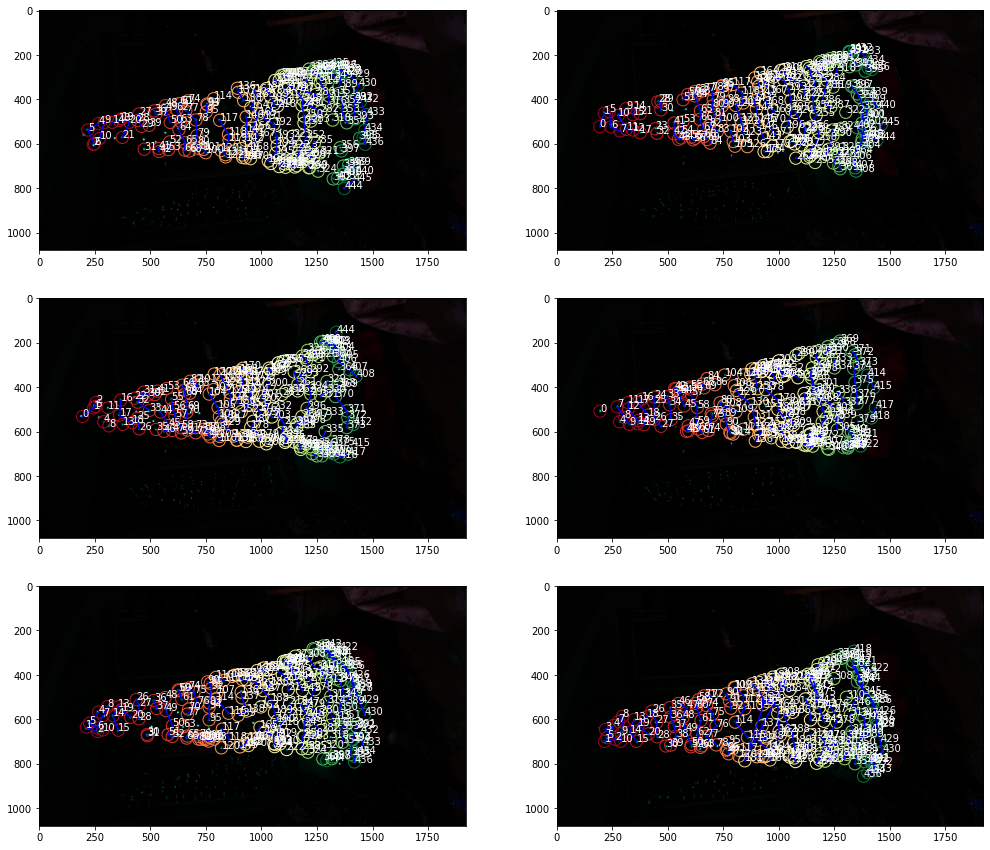

In [31]:
import pickle
from xmas_lights import plot_images

plot_images(imgs, imgpoints)

# np.array(imgpoints).reshape(5, 100, 2).shape
# bulb_found = [np.squeeze(np.all(np.isfinite(pts), axis=2)) for pts in imgpoints]
# bulb_valid = np.sum(np.array(bulb_found), axis=0) >= 1

# Save calibration in file
dataset = {"imgpoints": imgpoints, "imgs": imgs}
outfile = open('geneva_tree_imgpoints.pickle', 'wb')
pickle.dump(dataset, outfile)
outfile.close()

valid = [np.squeeze(np.all(np.isfinite(pts), axis=2)) for pts in imgpoints]
np.sum(np.array(valid), axis=0) >= 1

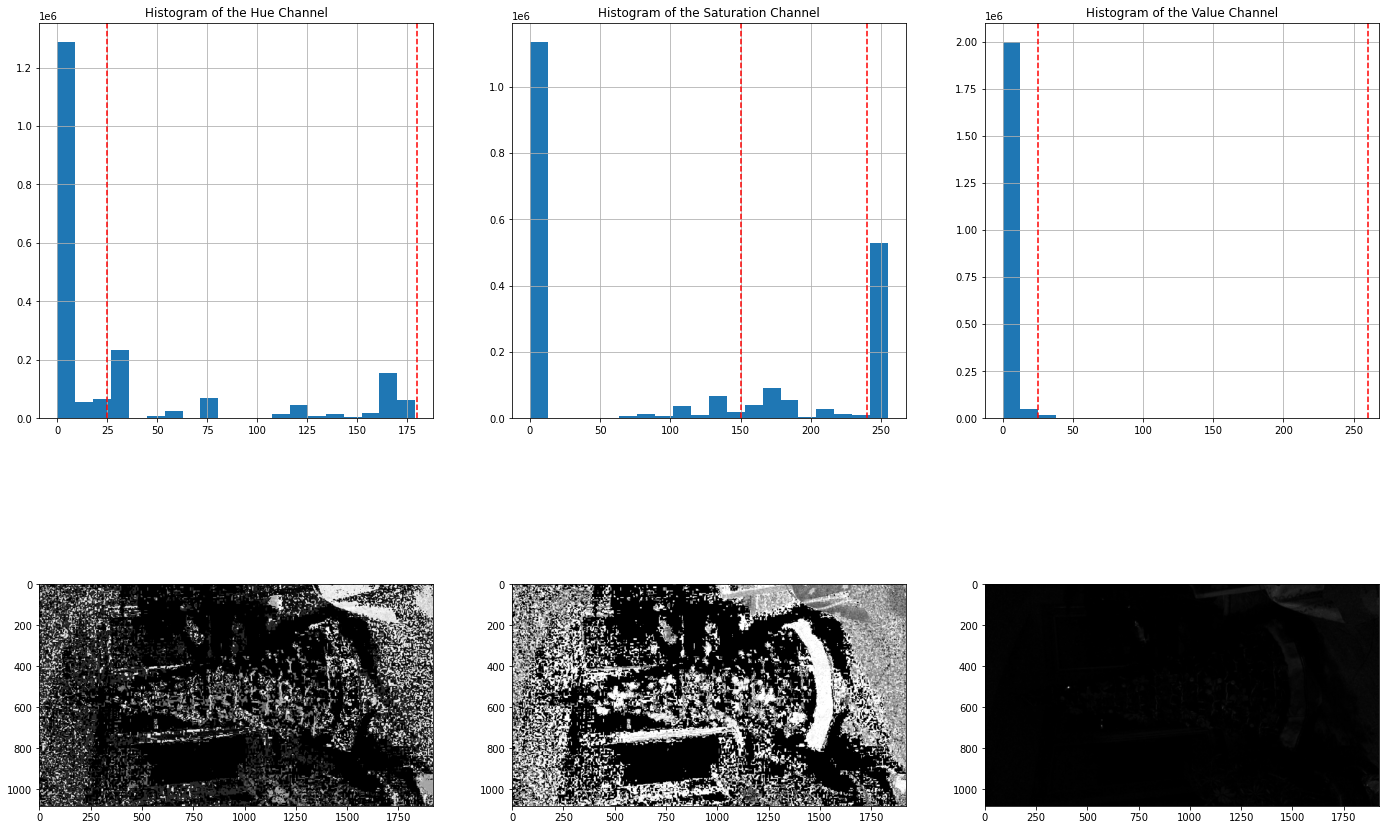

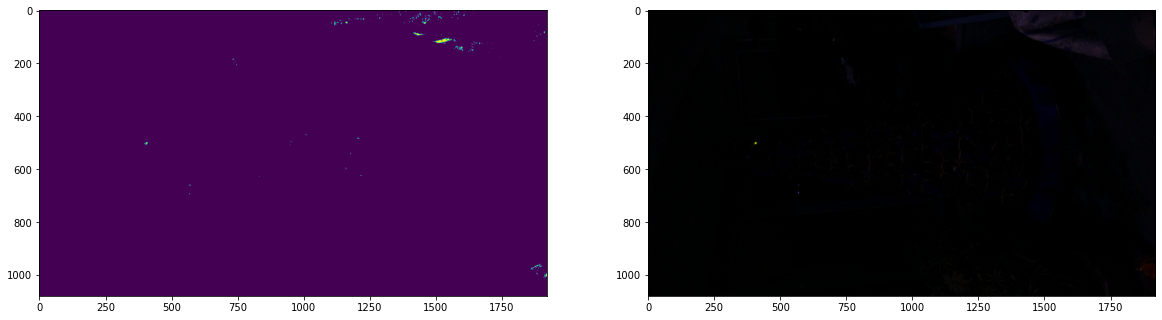

In [15]:
# Selecting the threshold value for segmentation

# move to first light flash and read frame
# td.set_time(time_start + td.flash_pattern_time[0] + 14.0)
# td.set_time(time_start + td.flash_pattern_time[2])
# _, frame = td.read()

# Select [V]alue channel
center = (500, 375)
tol = 100
# cv2 uses ranges [0-179, 0-255, 0-255] for HSV channels
# img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)#[center[0]-tol/2 : center[0]+tol/2, center[1]-tol/2 : center[1]+tol/2, :]
# img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
folder = output_folder[0]
bulb_num = 20
image_path = os.path.join(folder, bulb_image_name % bulb_num)
frame = cv2.imread(image_path)#[int(center[0]-tol/2) : int(center[0]+tol/2), int(center[1]-tol/2) : int(center[1]+tol/2), :]#[40:60,70:90,:]
img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# center = (450, 200)
# tol = 50
# img = img[center[0]-tol/2 : center[0]+tol/2, center[1]-tol/2 : center[1]+tol/2, :]
# value = img[:,:,2]  # goes from 0 to 255

hsv_min = (25, 150, 25)
hsv_max = (180, 240, 260)

plt.figure(figsize=(24,16))
plt.subplot(2,3,1)
plt.hist(img[:,:,0].reshape(-1), bins=20)
plt.title('Histogram of the Hue Channel')
plt.grid()
plt.axvline(hsv_min[0], linestyle='--', color="red")
plt.axvline(hsv_max[0], linestyle='--', color="red")

plt.subplot(2,3,2)
plt.hist(img[:,:,1].reshape(-1), bins=20)
plt.title('Histogram of the Saturation Channel')
plt.grid()
plt.axvline(hsv_min[1], linestyle='--', color="red")
plt.axvline(hsv_max[1], linestyle='--', color="red")

plt.subplot(2,3,3)
plt.hist(img[:,:,2].reshape(-1), bins=20)
plt.title('Histogram of the Value Channel')
plt.grid()
plt.axvline(hsv_min[2], linestyle='--', color="red")
plt.axvline(hsv_max[2], linestyle='--', color="red")

plt.subplot(2,3,4)
plt.imshow(img[:,:,0], cmap="gray", vmin=0, vmax=179)

plt.subplot(2,3,5)
plt.imshow(img[:,:,1], cmap="gray", vmin=0, vmax=255)

plt.subplot(2,3,6)
plt.imshow(img[:,:,2], cmap="gray", vmin=0, vmax=255)

plt.show()

mask = (img[:,:,0] >= hsv_min[0]) & (img[:,:,0] <= hsv_max[0]) & \
       (img[:,:,1] >= hsv_min[1]) & (img[:,:,1] <= hsv_max[1]) & \
       (img[:,:,2] >= hsv_min[2]) & (img[:,:,2] <= hsv_max[2])

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# mask = cv2.morphologyEx(mask.astype('uint8'), cv2.MORPH_CLOSE, kernel)
# mask = cv2.morphologyEx(mask.astype('uint8'), cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
plt.imshow(mask)
plt.subplot(1,2,2)
plt.imshow(frame)

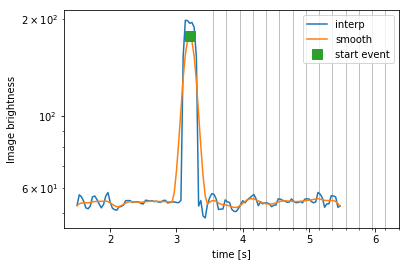

In [70]:
td = TreeDetector(videoPath[1])
td.set_time(time_start_aprox[1] + 1.5)

time_start = td.find_flash_events(viz=True, time_tol=2)

ax = plt.gca()
ax.set_xticks(time_start + td.flash_pattern_time[:15], minor=True)
ax.xaxis.grid(True, which='minor')
plt.show()


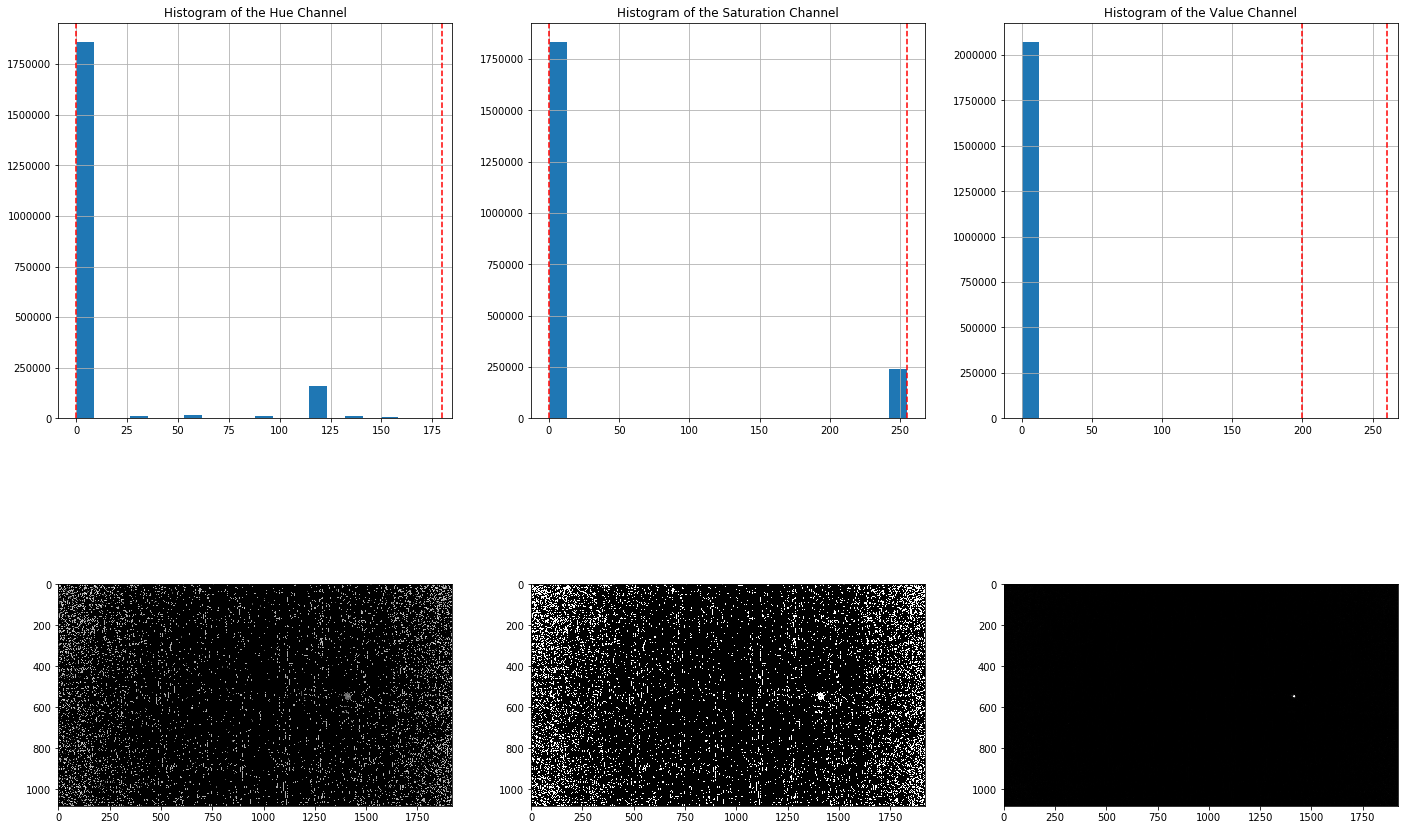

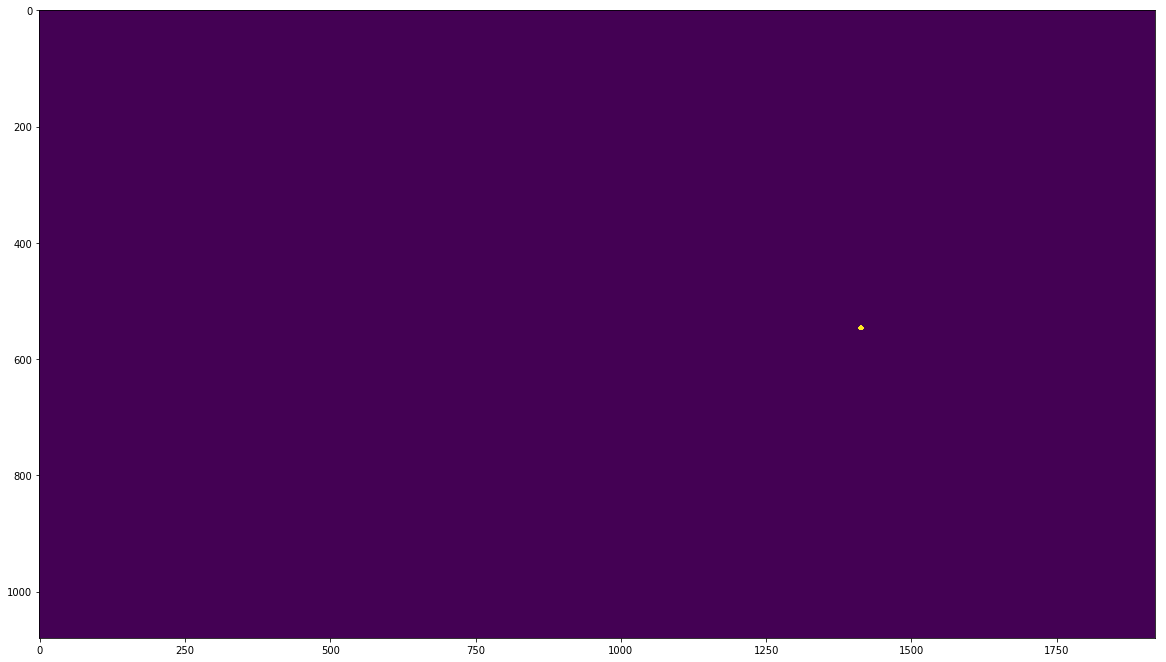

In [124]:
# Selecting the threshold value for segmentation

# move to first light flash and read frame
# td.set_time(time_start + td.flash_pattern_time[0] + 14.0)
td.set_time(time_start + td.flash_pattern_time[3])
_, frame = td.read()

# Select [V]alue channel
center = (680, 980)
tol = 500
# cv2 uses ranges [0-179, 0-255, 0-255] for HSV channels
img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)#[center[0]-tol/2 : center[0]+tol/2, center[1]-tol/2 : center[1]+tol/2, :]

# center = (450, 200)
# tol = 50
# img = img[center[0]-tol/2 : center[0]+tol/2, center[1]-tol/2 : center[1]+tol/2, :]
# value = img[:,:,2]  # goes from 0 to 255

hsv_min = (0, 0, 200)
hsv_max = (180, 255, 260)

plt.figure(figsize=(24,16))
plt.subplot(2,3,1)
plt.hist(img[:,:,0].reshape(-1), bins=20)
plt.title('Histogram of the Hue Channel')
plt.grid()
plt.axvline(hsv_min[0], linestyle='--', color="red")
plt.axvline(hsv_max[0], linestyle='--', color="red")

plt.subplot(2,3,2)
plt.hist(img[:,:,1].reshape(-1), bins=20)
plt.title('Histogram of the Saturation Channel')
plt.grid()
plt.axvline(hsv_min[1], linestyle='--', color="red")
plt.axvline(hsv_max[1], linestyle='--', color="red")

plt.subplot(2,3,3)
plt.hist(img[:,:,2].reshape(-1), bins=20)
plt.title('Histogram of the Value Channel')
plt.grid()
plt.axvline(hsv_min[2], linestyle='--', color="red")
plt.axvline(hsv_max[2], linestyle='--', color="red")

plt.subplot(2,3,4)
plt.imshow(img[:,:,0], cmap="gray", vmin=0, vmax=179)

plt.subplot(2,3,5)
plt.imshow(img[:,:,1], cmap="gray", vmin=0, vmax=255)

plt.subplot(2,3,6)
plt.imshow(img[:,:,2], cmap="gray", vmin=0, vmax=255)

plt.show()

mask = (img[:,:,0] >= hsv_min[0]) & (img[:,:,0] <= hsv_max[0]) & \
       (img[:,:,1] >= hsv_min[1]) & (img[:,:,1] <= hsv_max[1]) & \
       (img[:,:,2] >= hsv_min[2]) & (img[:,:,2] <= hsv_max[2])

plt.figure(figsize=(20,16))
plt.imshow(mask)
